- Data that we use should align with the live data feed for executing trades.
- We might need additional supporting data such as: satellite image, sensor data, web traffic data, customer reviews, etc. But make sure that it is legal to obtain the data.
- Options:
    - Yahoo finance
    - Nasdaq data link
    - Intrinio
    - Alpha vantage
    - CoinGecko

In [1]:
import os
import pandas as pd
import yfinance as yf
import time
from typing import Optional

NOTEBOOK_PATH = os.getcwd()
PROJECT_DIR = os.path.abspath(os.path.join(NOTEBOOK_PATH, os.pardir))
print(f"Notebook path: {NOTEBOOK_PATH}")
print(f"Project directory: {PROJECT_DIR}")

os.chdir(PROJECT_DIR)
print(f"Working directory changed to: {os.getcwd()}")

Notebook path: /home/ahmadyusuf/ds_fun/ds-playground/finance/notebooks
Project directory: /home/ahmadyusuf/ds_fun/ds-playground/finance
Working directory changed to: /home/ahmadyusuf/ds_fun/ds-playground/finance


In [2]:
def daily_one_ticker_acquisition(
    ticker_code: str, 
    start_date: str, 
    end_date: str, 
    n_retry: int = 3, 
    timeout: int = 120,
    sleep_time: int = 10,
    save_csv_path: Optional[str] = None
) -> pd.DataFrame:
    for n_attempt in range(n_retry):
        try:
            df = yf.download(
                ticker_code,
                start=start_date,
                end=end_date,
                timeout=timeout
            )
            df = df.droplevel(1, axis=1)
            print(f"Success acquiring data for: {ticker_code} from {start_date} to {end_date}")
            
            if save_csv_path:
                df.to_csv(save_csv_path)
                print(f"Saved .csv to {save_csv_path}")

            print(df.info())
            print(df.head())

            return df
        
        except Exception as e:
            print(f"Attempt {n_attempt+1} failed. Error: {e}")
            time.sleep(sleep_time)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Success acquiring data for: BBCA.JK from 2025-01-01 to 2025-10-22
Saved .csv to ./data/daily_BBCA_2025-01-01_2025-10-22.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2025-01-02 to 2025-10-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   188 non-null    float64
 1   High    188 non-null    float64
 2   Low     188 non-null    float64
 3   Open    188 non-null    float64
 4   Volume  188 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.8 KB
None
Price             Close         High          Low         Open    Volume
Date                                                                    
2025-01-02  9604.477539  9604.477539  9361.940227  9361.940227  38124800
2025-01-03  9555.970703  9628.731901  9531.716970  9555.970703  41916000
2025-01-06  9386.194336  9580.224193  9361.940604  9555.970461  41593900
2025-01-07  9240.671875  9434.701731  9240.671875  9386.194267  71318600
2

<Axes: xlabel='Date'>

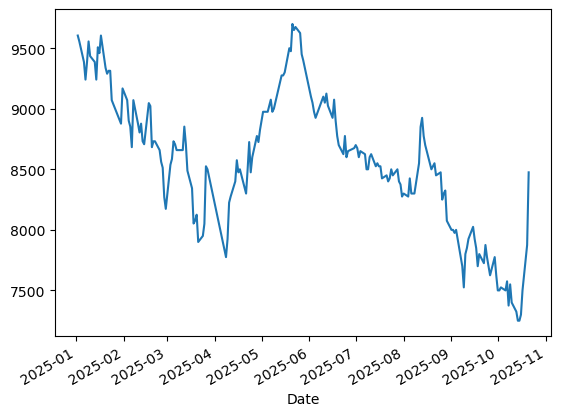

In [3]:
TICKER_CODE = "BBCA.JK"
START_DATE = "2025-01-01"
END_DATE = "2025-10-22"

bca_stock = daily_one_ticker_acquisition(
    TICKER_CODE,
    START_DATE,
    END_DATE,
    save_csv_path=f"./data/daily_{TICKER_CODE.split(".")[0]}_{START_DATE}_{END_DATE}.csv"
)
bca_stock.Close.plot()

In [14]:
bca_stock_instance = yf.Ticker(TICKER_CODE)
bca_stock_instance.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-21 00:00:00+07:00,8100.0,8475.0,8100.0,8475.0,529802600,0.0,0.0
2025-10-22 00:00:00+07:00,8700.0,8700.0,8200.0,8200.0,392957200,0.0,0.0
2025-10-23 00:00:00+07:00,8200.0,8350.0,8150.0,8325.0,187003900,0.0,0.0
2025-10-24 00:00:00+07:00,8300.0,8375.0,8275.0,8275.0,133355100,0.0,0.0
2025-10-27 00:00:00+07:00,8325.0,8425.0,8200.0,8350.0,182275600,0.0,0.0
2025-10-28 00:00:00+07:00,8350.0,8400.0,8250.0,8275.0,180270000,0.0,0.0
2025-10-29 00:00:00+07:00,8300.0,8600.0,8275.0,8600.0,239156800,0.0,0.0
2025-10-30 00:00:00+07:00,8575.0,8750.0,8475.0,8525.0,259009800,0.0,0.0
2025-10-31 00:00:00+07:00,8550.0,8650.0,8525.0,8525.0,177088000,0.0,0.0


In [15]:
bca_stock_instance.get_info()

{'address1': 'Menara BCA, Grand Indonesia',
 'address2': 'Jl. M.H. Thamrin No. 1',
 'city': 'Jakarta',
 'zip': '10310',
 'country': 'Indonesia',
 'phone': '62 21 2358 8000',
 'fax': '62 21 2358 8300',
 'website': 'https://www.bca.co.id',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'PT Bank Central Asia Tbk, together with its subsidiaries, provides banking products and other financial services to individual, corporate, and small and medium enterprise customers in Indonesia and internationally. It operates through Transaction Banking, Corporate Banking, Commercial & Small & Medium Enterprise SME Banking, Individual Banking, and Treasury and International Banking segments. The company offers various products and services, such as individual and business saving, deposit, loan, and electronic money accou

In [16]:
bca_stock_instance.get_major_holders()

Breakdown,Value
insidersPercentHeld,0.59702
institutionsPercentHeld,0.21764
institutionsFloatPercentHeld,0.54006
institutionsCount,416.00000


In [17]:
bca_stock_instance.get_financials()

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
TaxEffectOfUnusualItems,163770209004.241547,231741227696.78183,8518954908.048587,-4292230298.960582
TaxRateForCalcs,0.19594,0.191454,0.192432,0.190546
TotalUnusualItems,835820000000.0,1210427000000.0,44270000000.0,-22526000000.0
TotalUnusualItemsExcludingGoodwill,835820000000.0,1210427000000.0,44270000000.0,-22526000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,54836305000000.0,48639122000000.0,40735722000000.0,31422660000000.0
ReconciledDepreciation,2167549000000.0,3211483000000.0,2662190000000.0,2447189000000.0
NetInterestIncome,84360786000000.0,77050359000000.0,65701870000000.0,57818655000000.0
InterestExpense,9885265000000.0,9731953000000.0,6012580000000.0,7539237000000.0
InterestIncome,94246051000000.0,86782312000000.0,71714450000000.0,65357892000000.0
NormalizedIncome,54164255209004.242188,47660436227696.78125,40699970954908.046875,31440893769701.039062
